A branch cut is a curve (with ends possibly open, closed, or half-open) in the complex plane across which an analytic multivalued function is discontinuous

example : what is a inverse function to the square root of a complex number?

In [1]:
# usual imports
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
plt.style.use('seaborn-white')

In [2]:
def numpy_sqrt(z):
    "Complex square root function."
    return np.sqrt(z)

In [3]:
from mpl_toolkits.mplot3d import Axes3D

def argand_plot(func):
    "Plots a function in the Argand (complex) plane."
    X, Y = np.meshgrid(np.linspace(-2, 2),
                      np.linspace(-2, 2))
    Z = X + 1j * Y
    ax1 = plt.gcf().add_subplot(211, projection='3d')
    ax2 = plt.gcf().add_subplot(212, projection='3d')
    ax1.plot_surface(X, Y, np.real(func(Z)), rstride=1, cstride=1, cmap='viridis')
    ax1.set_xlabel('real axis')
    ax1.set_ylabel('imaginary axis')
    ax1.set_title('real part')
    ax2.plot_surface(X, Y, np.imag(func(Z)), rstride=1, cstride=1, cmap='magma')
    ax2.set_xlabel('real axis')
    ax2.set_ylabel('imaginary axis')
    ax2.set_title('imaginary part')

In [5]:
plt.rcParams['figure.figsize'] = (6, 7)

<IPython.core.display.Javascript object>


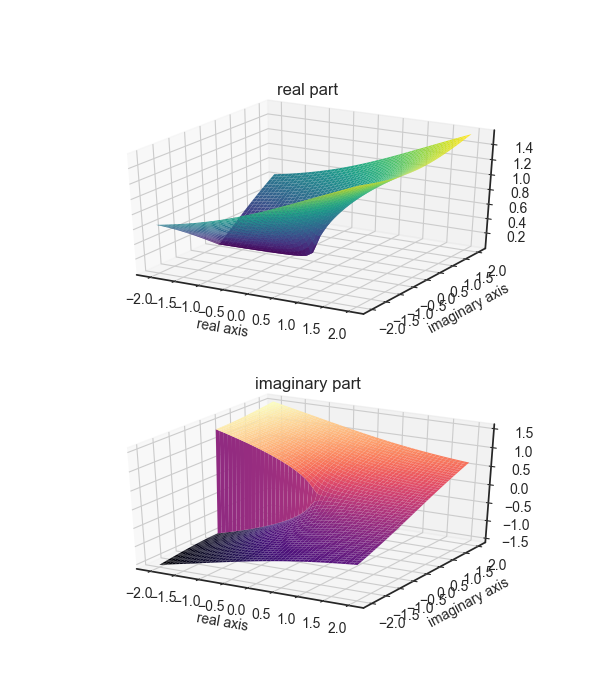

In [6]:
plt.figure()
argand_plot(numpy_sqrt)

As seen above, the standard square root function has a branch cut along the negative reals. 

In [8]:
theta = np.linspace(0, 2 * np.pi, num=26, endpoint=False)
unit_circle = [np.exp(1j * _) for _ in theta]

In [9]:
def plot_along_curve(func=numpy_sqrt, param=theta, curve=unit_circle):
    "Plots curve and real/imag values of function func along given curve."
    plt.subplot(121)
    plt.plot(np.real(curve), np.imag(curve), 'o')
    x = np.real(curve)
    y = np.imag(curve)
    plt.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1)
    plt.xlim(-1.25, 1.25)
    plt.ylim(-1.25, 1.25)
    domain_coloring_plot(func)
    plt.subplot(122)
    plt.plot(param, np.imag(func(curve)), label='imaginary part')
    plt.plot(param, np.real(func(curve)), label='real part')
    plt.legend(loc='lower left')
    plt.xlabel('angle $\\theta$ along the circle (rad)')

In [11]:
def square_root(z, theta):
    "Square root with different branch cut defined by alpha parameter."
    argument = np.angle(z) # between -pi and +pi
    modulus = np.abs(z)
    argument = np.mod(argument + theta, 2 * np.pi) - theta
    return np.sqrt(modulus) * np.exp(1j * argument / 2)

In [12]:
normal_sqrt = lambda z: square_root(z, np.pi)

In [13]:
np.allclose(np.abs(normal_sqrt(unit_circle)),
            np.abs(numpy_sqrt(unit_circle)))

True

<IPython.core.display.Javascript object>


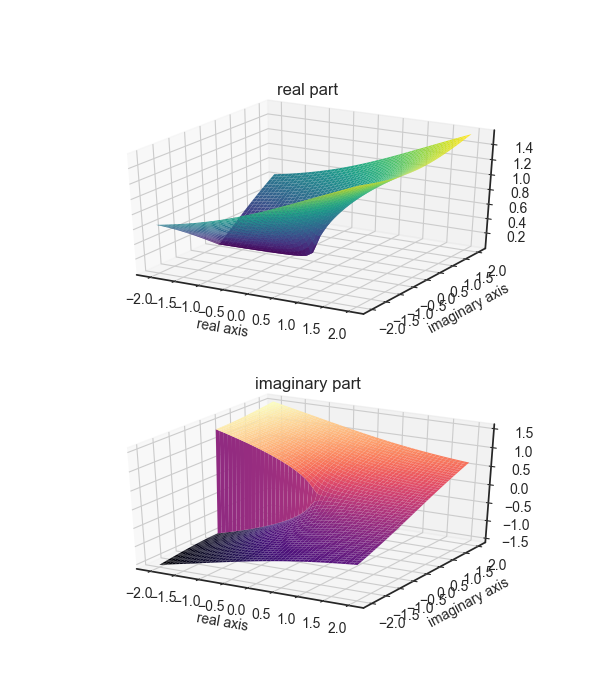

In [14]:
plt.figure()
argand_plot(normal_sqrt)

Putting the branch cut on the real line

In [15]:
real_pos_sqrt = lambda z: square_root(z, 2 *np.pi)

<IPython.core.display.Javascript object>


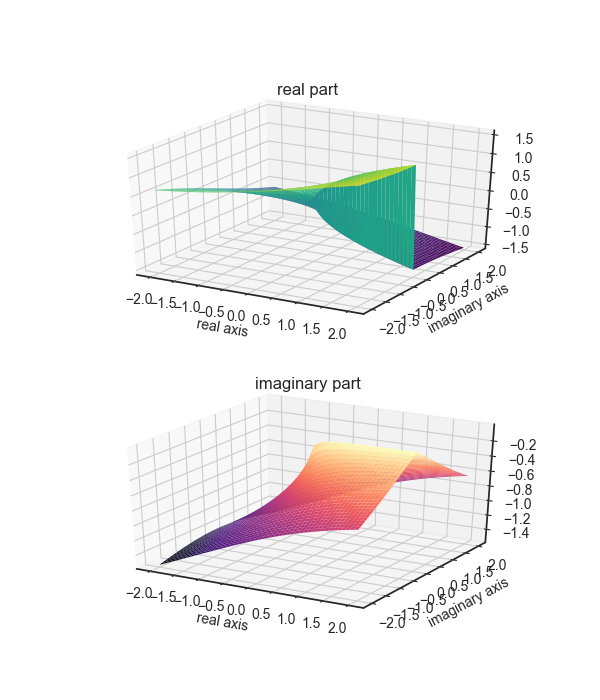

In [16]:
plt.figure()
argand_plot(real_pos_sqrt)

Due to the default branch cut, this square root generates a discontinuity along the path that I want to integrate on